In [1]:
from gp_poly_test import gp_sin_test
from IPython.display import Audio
from gp import GP
from gp_trees import GPNonTerminal, Constant
from figtree import showtree
from math import pi

##### <h3>How to call <code>gp_sin_test</code></h3>

This notebook can be used to test a slightly simplified version of genetic programming, in which the initial seed population is a set of single-variable <i>n</i>th order polynomials with randomised coefficients. During training, both mutation and crossover operators are used 

The test is performed with a single function call to `gp_sin_test`. First edit the function call below as needed, then hit the 'run all' button. 

The cell at the top of the notebook imports the code needed to run everything. The second cell is the one you may want to edit to change the parameters of the test. The basic syntax for is `gp_sin_test` is:

`gp_sin_test(n)`

... where `n` is the number of samples used, e.g.:

`gp_poly_test(100)`

... would create an array `X` of 100 values of _x_, and a `target` array with the corresponding values of _sin x_. The trees in the genetic program are then scored on how well they estimate `target` given `X`.

Further optional keyword parameters can be set, which otherwise will take default values:

<ul>
    <li><b>generations (default = 100)</b>: Number of generations the GP runs for</li>
    <li><b>pop (default = 100)</b>: Number of trees in a generation</li>
    <li><b>iv_min (default = -5*pi)</b>: Minimum value of a variable in the independent variables dataset</li>
    <li><b>iv_max (default = 5*pi)</b>: Maximum value of a variable in the independent variables dataset</li>
    <li><b>coeff_min (default = -20)</b>: Minimum value of a coefficient in the target polynomial</li>
    <li><b>coeff_max (default = 20)</b>: Minimum value of a coefficient in the target polynomial</li>
    <li><b>mutation_rate (default =  0.2)</b>: Probability that a coefficient value in a GP tree will mutate from one generation to the next</li>
    <li><b>mutation_sd (default = 1.0)</b>: Standard deviation of the normal distribution defining the deltas added to coefficient values when they are mutated</li>
    <li><b>elitism (default = 5)</b>: The <em>k</em> best trees in each generation pass on one copy each to the next generation without any chance of mutation: this parameter sets the value of <em>k</em>. If it's zero, no trees are protected from mutation.</li>
   <li><b>order (default = 6)</b>: The order of the initial seed polynomials</li>
    <li><b>crossover_rate (default = 0.2)</b></li>
</ul>

One word of caution: GP takes a while to run - the program will appear to be doing nothing in between showing the tree for the target polynomial and displaying the results. This is normal. Make yourself a cuppa and come back in a bit. The final cell will ding to tell you it's done, and the variable `result` will then contain a dictionary with more detailed output data, which you can use to create further visualisations.

/Users/Squiddo/github/philoso-py/philoso_py/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Squiddo/github/philoso-py/philoso_py/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Squiddo/github/philoso-py/philoso_py/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Squiddo/github/philoso-py/philoso_py/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


Best trees by generation:
Gen 0: ('[tree("([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]-0.0007893206970832609)([float]<PROD>([float]0.0009968317238373313)([float]x)))([float]<PROD>([float]-0.00037791406208007624)([float]<SQ>([float]x))))([float]<PROD>([float]0.0005852985203233161)([float]<CUBE>([float]x))))([float]<PROD>([float]0.0009736468697319096)([float]<POW>([float]x)([int]4))))([float]<PROD>([float]0.0007617265864476451)([float]<POW>([float]x)([int]5))))([float]<PROD>([float]-0.00030524743504506424)([float]<POW>([float]x)([int]6))))([float]<PROD>([float]3.893072719004685e-06)([float]<POW>([float]x)([int]7))))")]',)
RMSE = 0.6629923778764552
Gen 10: ('[tree("([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]-0.013422017689891517)([float]<PROD>([float]<SQ>([float]x))([float]<POW>([float]<PROD>([float]0.0014396631702146175)([float]<POW>([float]x)([int]5)))([int]5))))([float]<PROD>([float]0.004497318292585992)([float]<SU

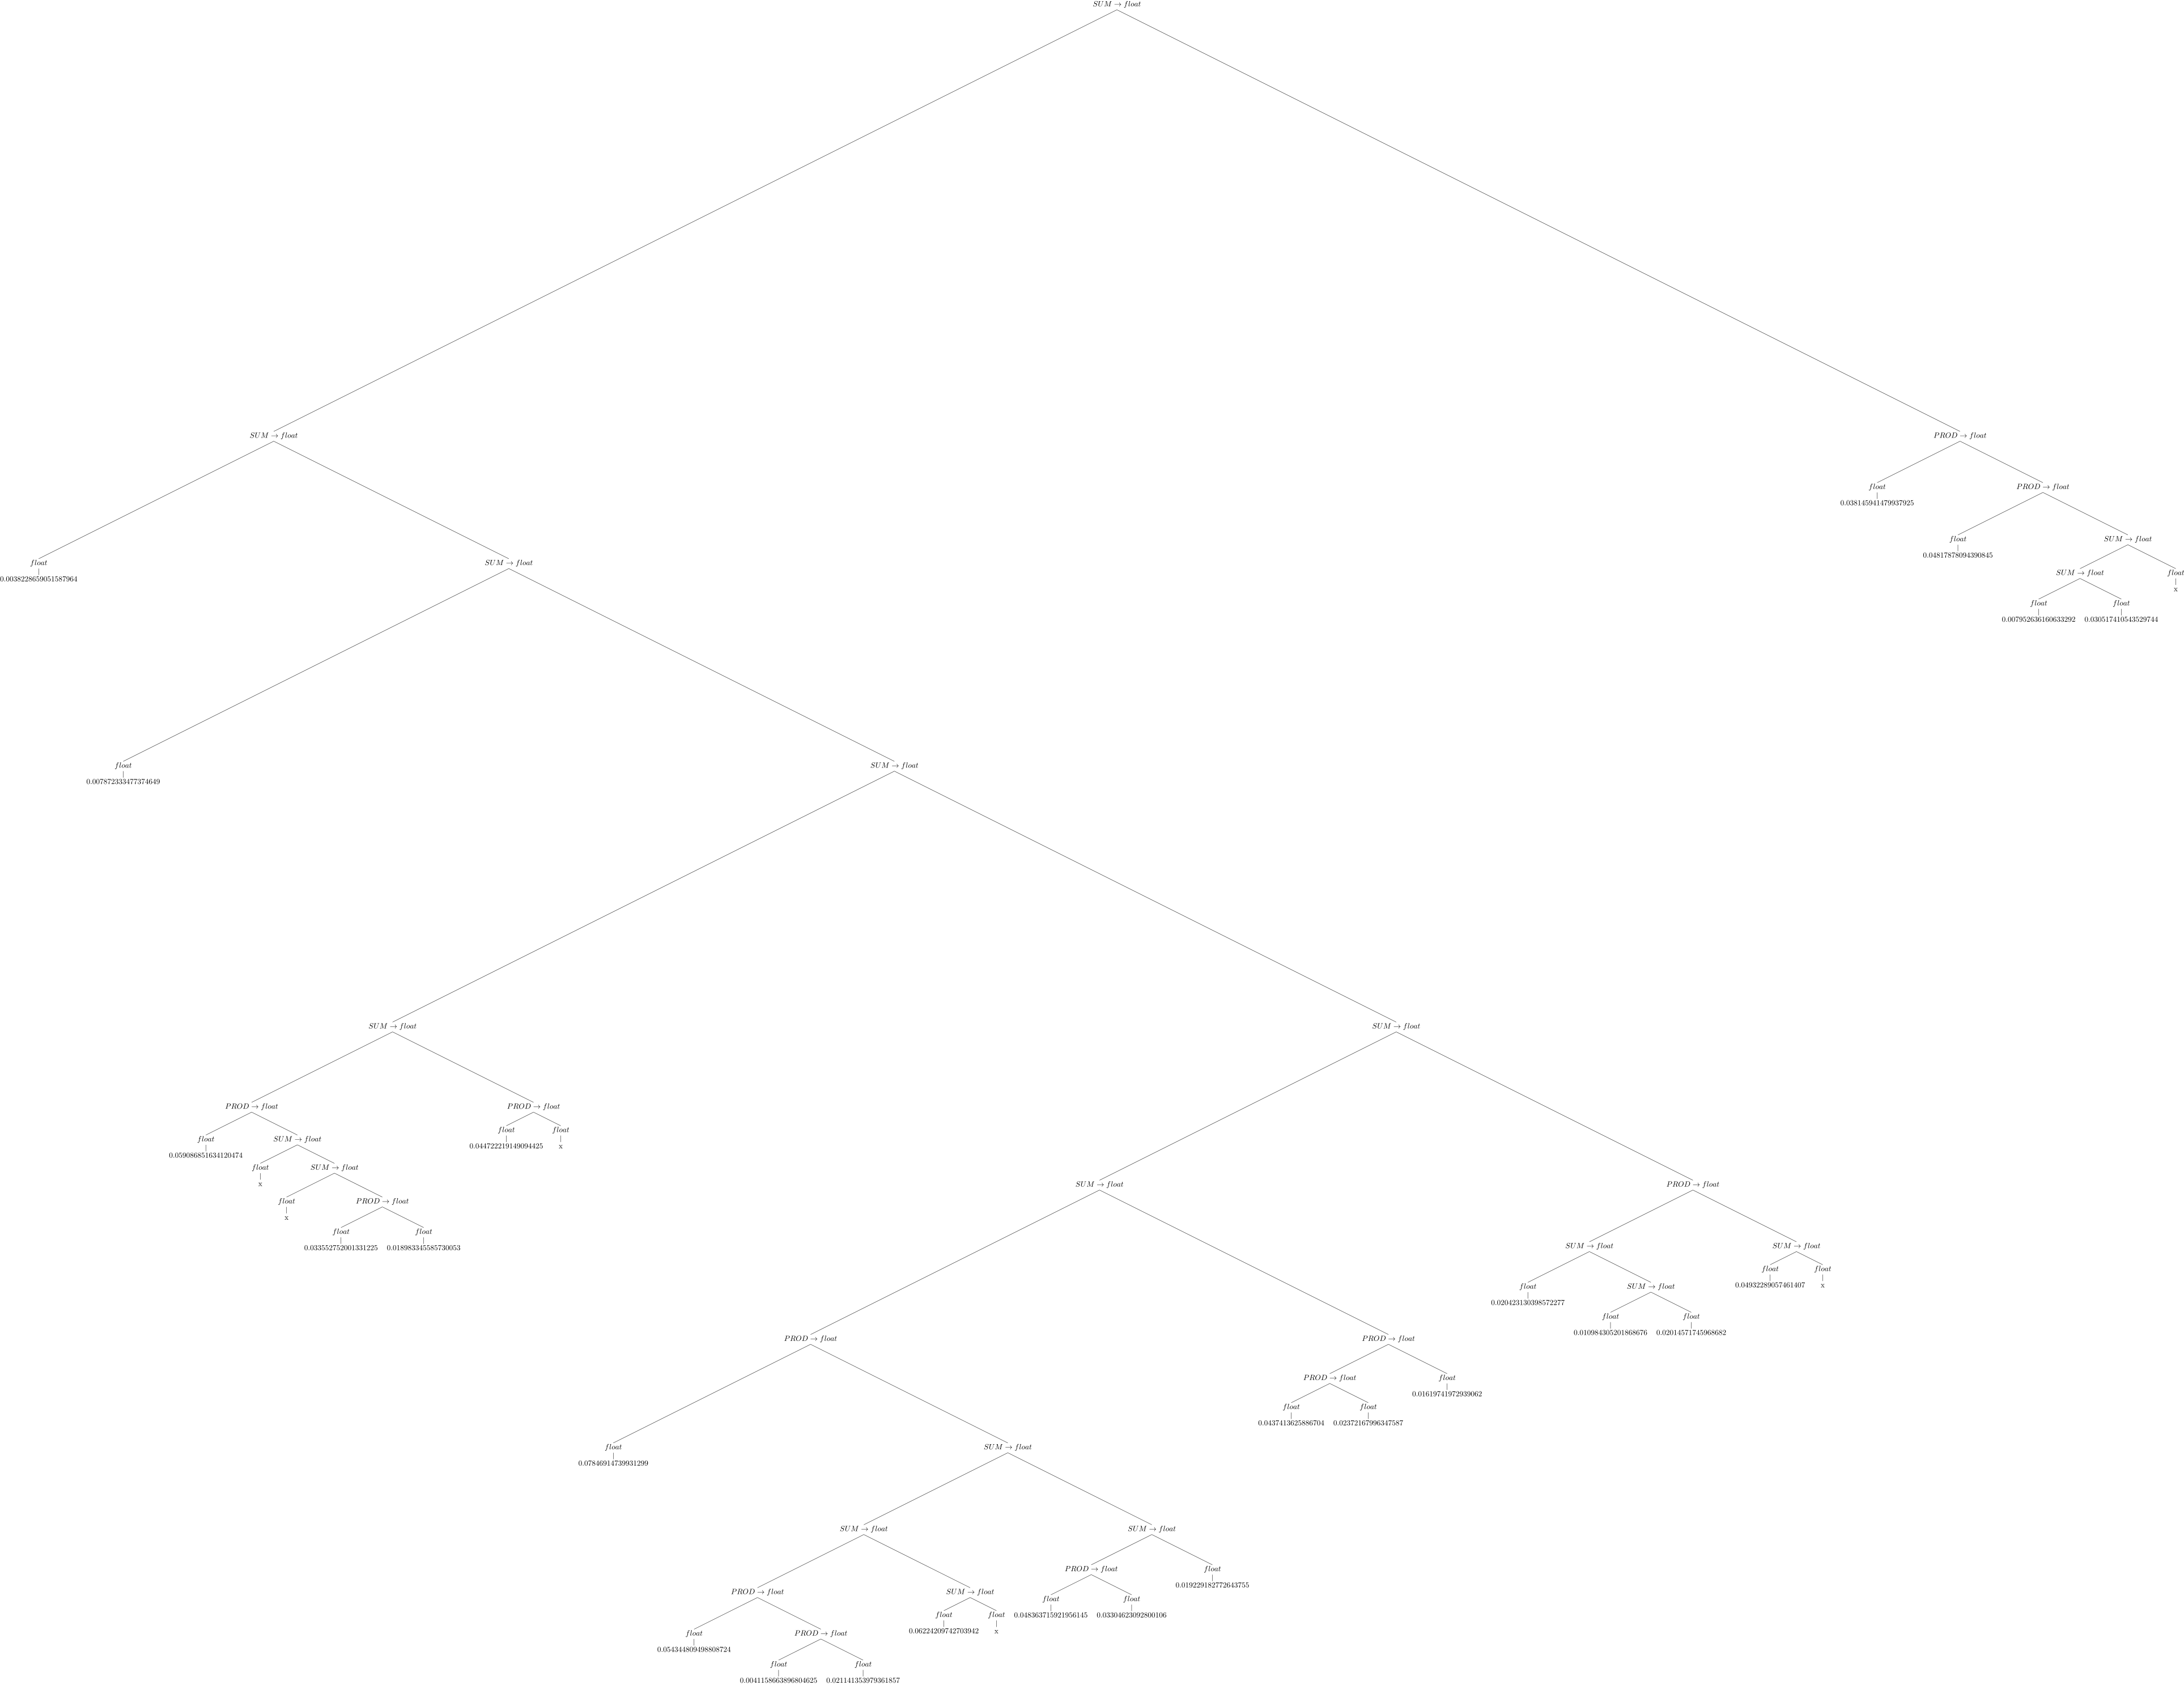

RMSE = 0.43442474117516866


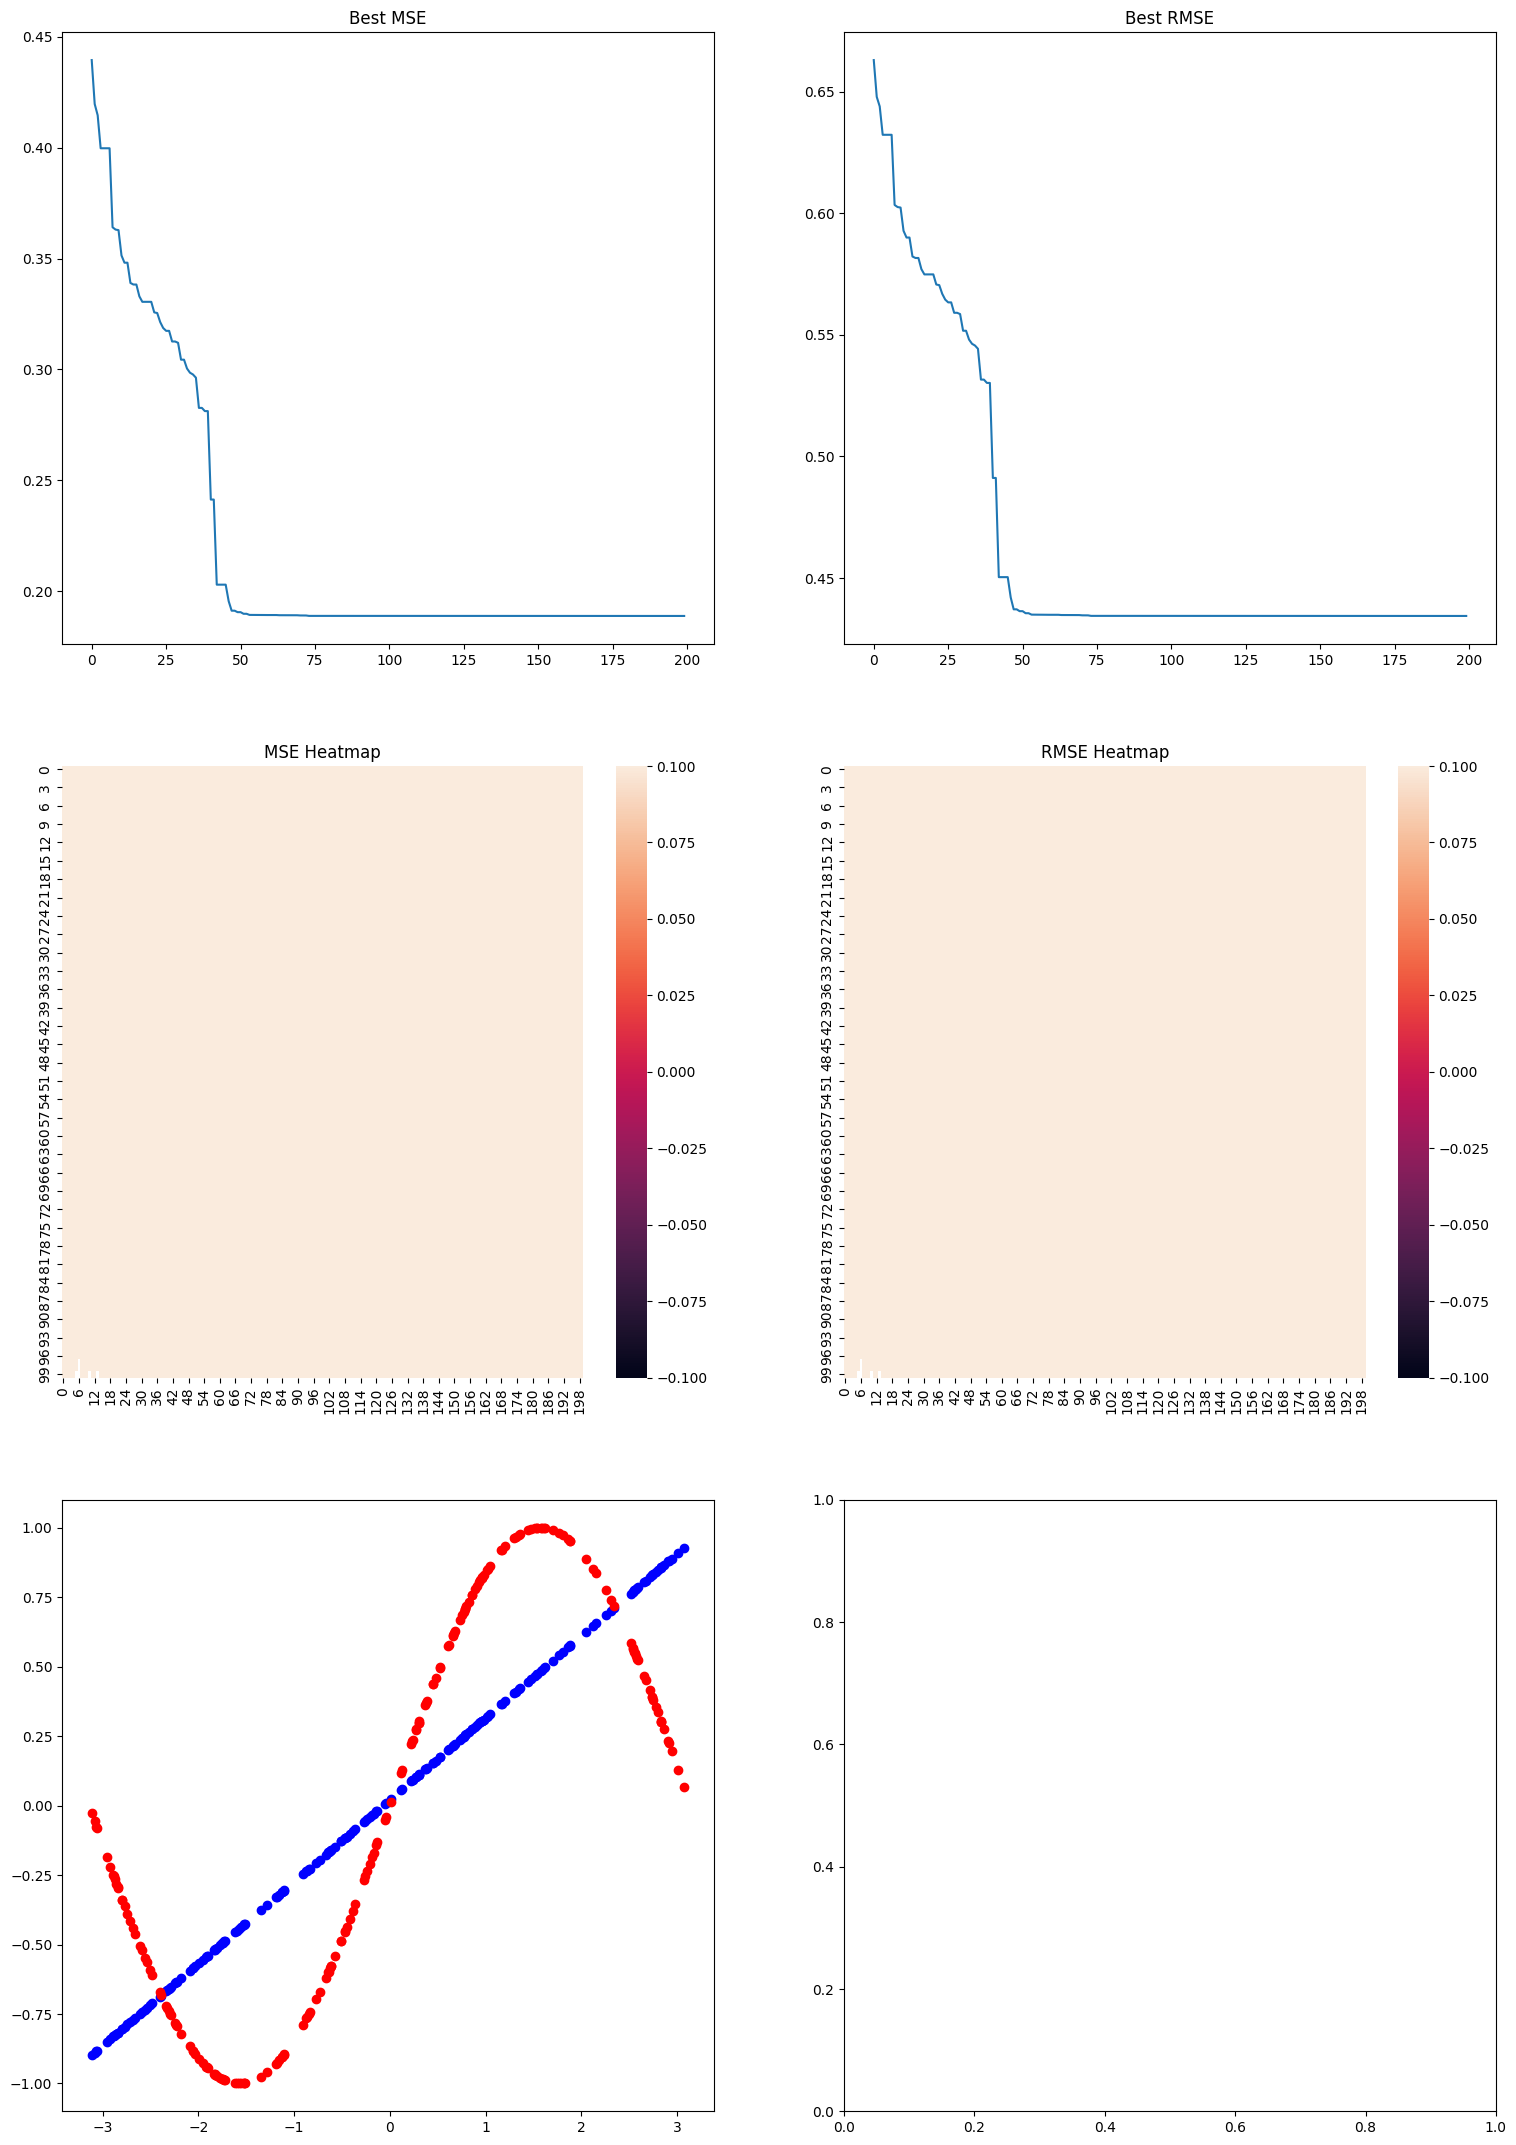

In [2]:
result = gp_sin_test(200, generations=200, pop=100, iv_min=-pi, iv_max = pi, coeff_min=-0.001, coeff_max=0.001, order=7, crossover_rate=0.05, mutation_sd=0.005)

In [3]:
Audio(filename = './sounds/ElevatorBell.mp3', autoplay=True, rate=22000)

In [4]:
# FIX THIS BASTID
import numpy as np
bestcopy = result['best'].copy()

def prune(tree_):
    if isinstance(tree_, GPNonTerminal):
        for t in tree_:
            prune(t)
        if np.prod([isinstance(t, Constant) for t in tree_]):
            replacement = Constant(tree_.treebank, tree_.label, tree_(), metadata=tree_.metadata)
            if tree_.parent:
                tree_.parent[tree_.parent.index_of(tree_)] = replacement
            tree_.delete()
            return replacement
        else:
            return tree_
    else:
        return tree_



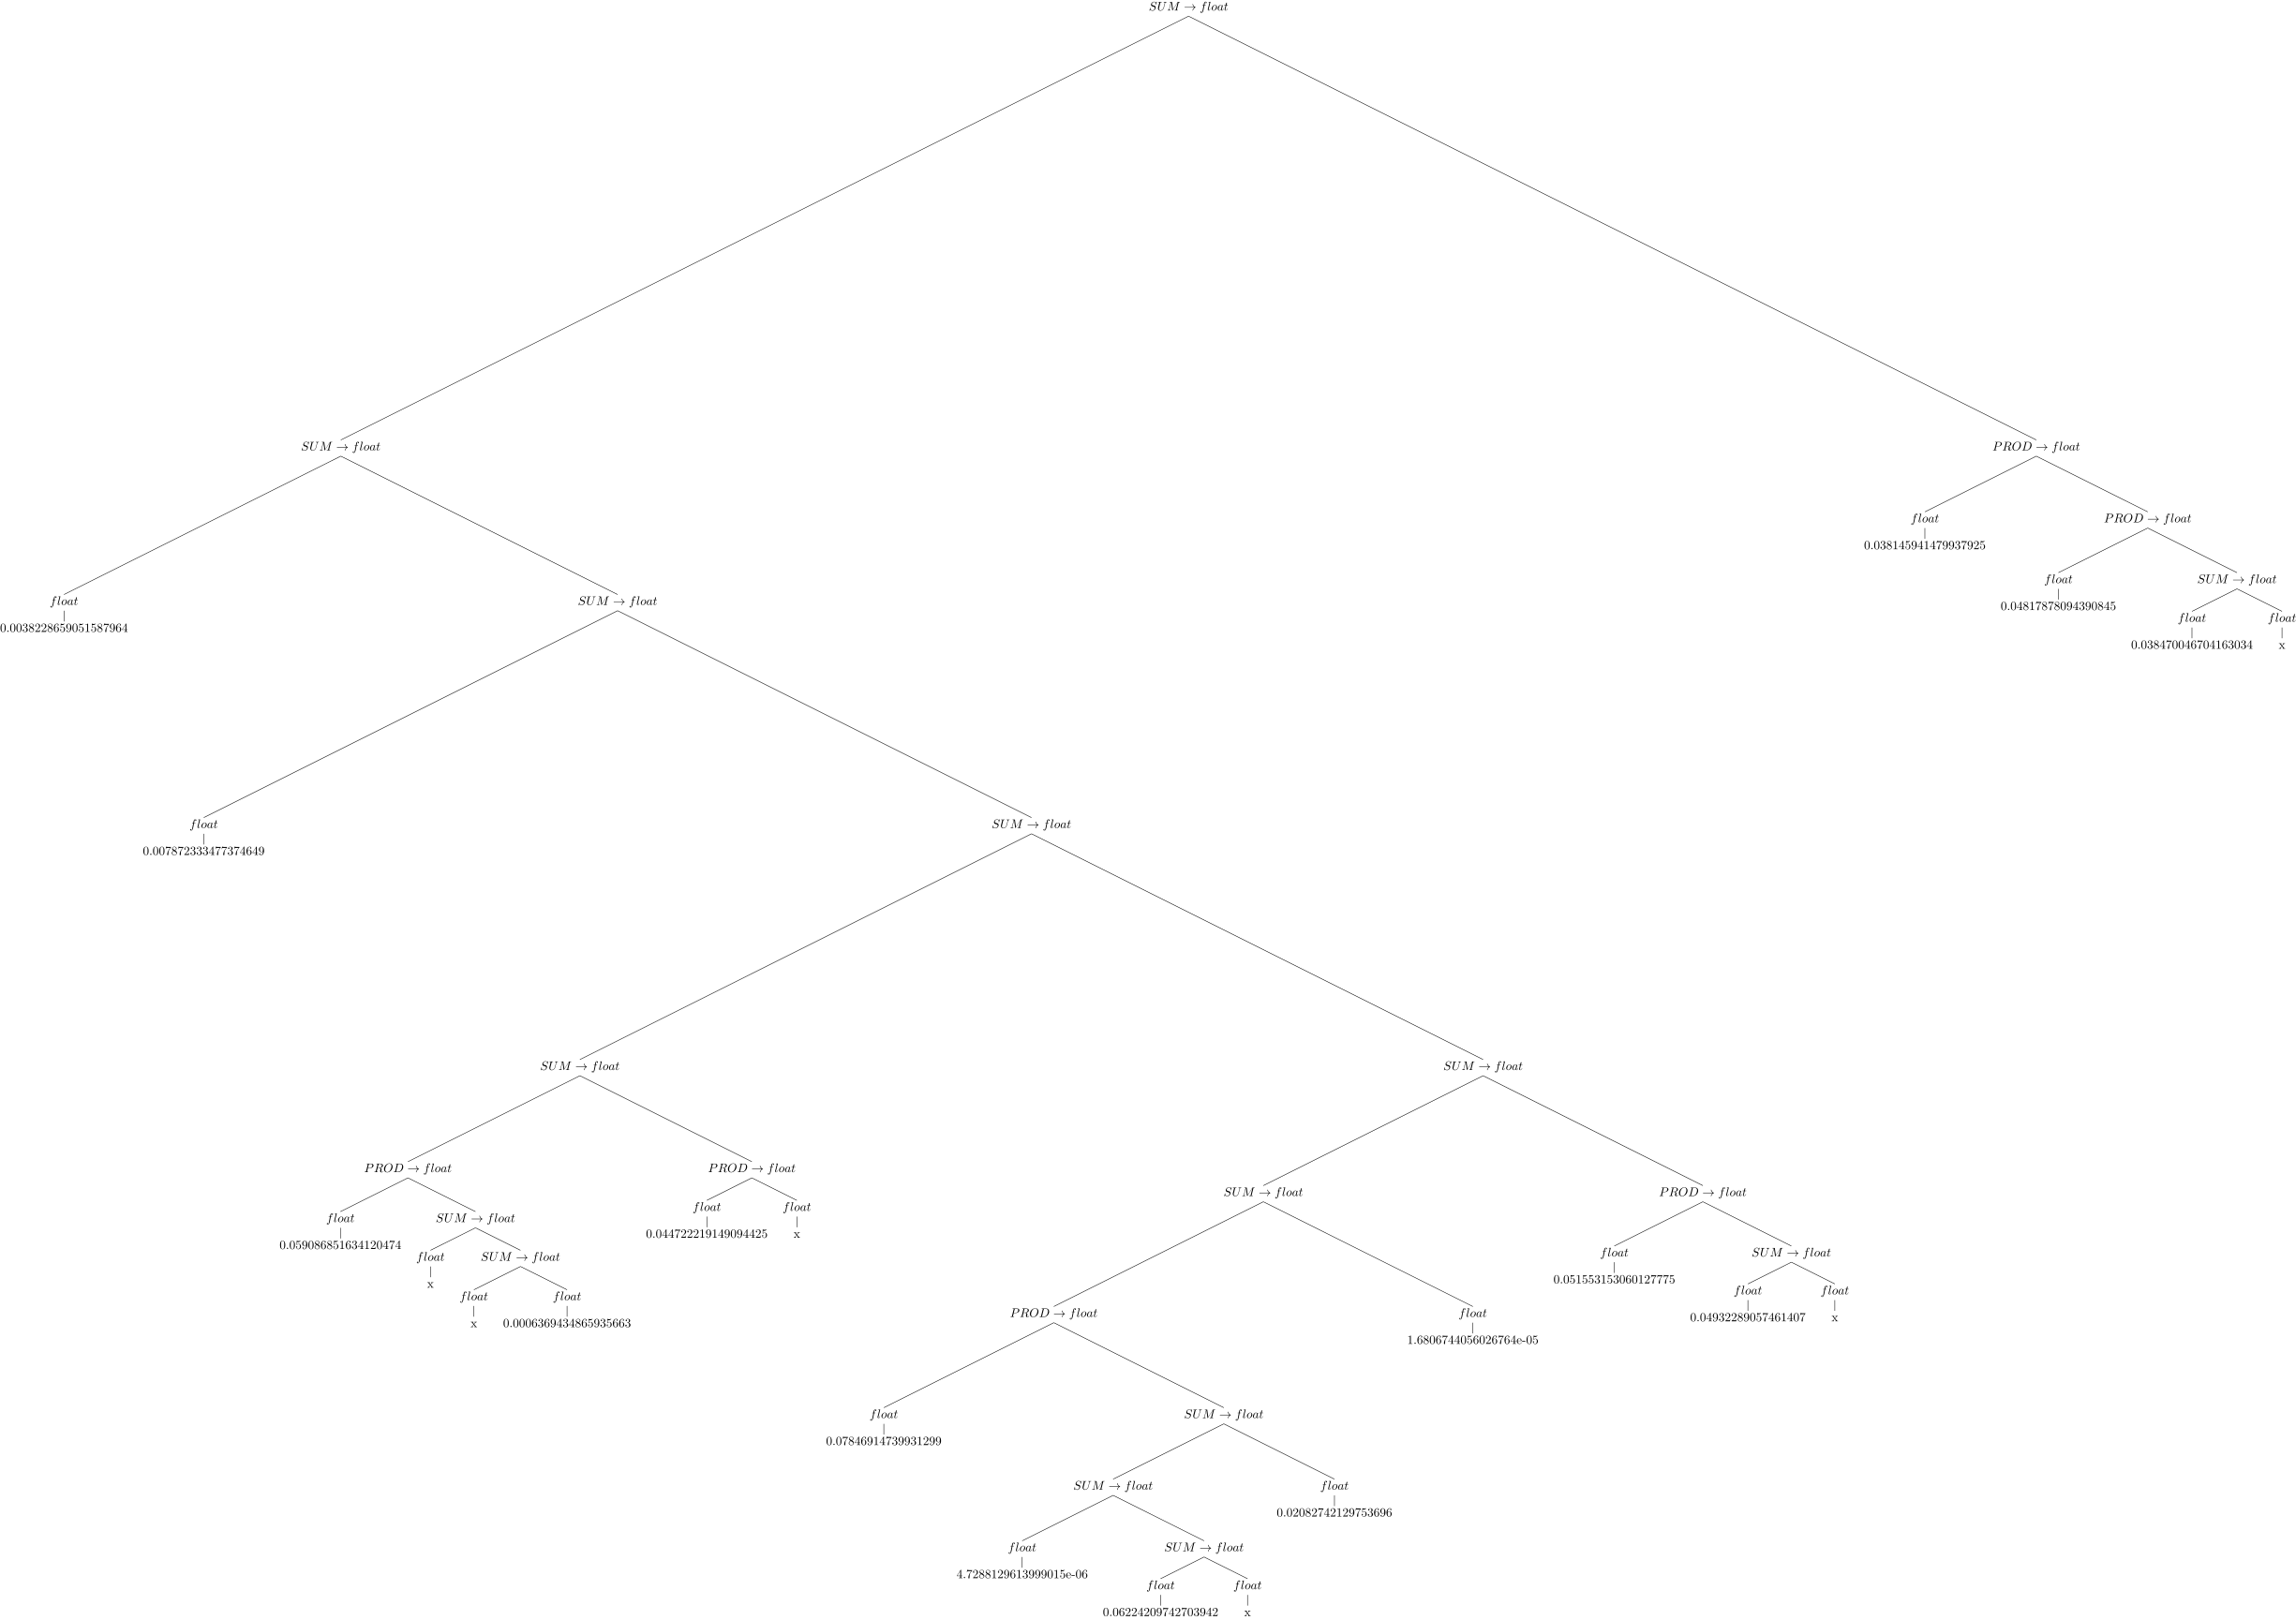

In [5]:
bc = prune(bestcopy)
showtree(bc)

In [6]:
bestcopy

tree("([float]<SUM>([float]<SUM>([float]0.0038228659051587964)([float]<SUM>([float]0.007872333477374649)([float]<SUM>([float]<SUM>([float]<PROD>([float]0.059086851634120474)([float]<SUM>([float]x)([float]<SUM>([float]x)([float]0.0006369434865935663))))([float]<PROD>([float]0.044722219149094425)([float]x)))([float]<SUM>([float]<SUM>([float]<PROD>([float]0.07846914739931299)([float]<SUM>([float]<SUM>([float]4.7288129613999015e-06)([float]<SUM>([float]0.06224209742703942)([float]x)))([float]0.02082742129753696)))([float]1.6806744056026764e-05))([float]<PROD>([float]0.051553153060127775)([float]<SUM>([float]0.04932289057461407)([float]x)))))))([float]<PROD>([float]0.038145941479937925)([float]<PROD>([float]0.04817878094390845)([float]<SUM>([float]0.038470046704163034)([float]x)))))")

In [7]:
bc

tree("([float]<SUM>([float]<SUM>([float]0.0038228659051587964)([float]<SUM>([float]0.007872333477374649)([float]<SUM>([float]<SUM>([float]<PROD>([float]0.059086851634120474)([float]<SUM>([float]x)([float]<SUM>([float]x)([float]0.0006369434865935663))))([float]<PROD>([float]0.044722219149094425)([float]x)))([float]<SUM>([float]<SUM>([float]<PROD>([float]0.07846914739931299)([float]<SUM>([float]<SUM>([float]4.7288129613999015e-06)([float]<SUM>([float]0.06224209742703942)([float]x)))([float]0.02082742129753696)))([float]1.6806744056026764e-05))([float]<PROD>([float]0.051553153060127775)([float]<SUM>([float]0.04932289057461407)([float]x)))))))([float]<PROD>([float]0.038145941479937925)([float]<PROD>([float]0.04817878094390845)([float]<SUM>([float]0.038470046704163034)([float]x)))))")